## Perform functional connectivity analysis on trial data, eyes open, and eyes closed data for all viable CLBP subjects
#### Input: *stc.mat
####  Output: con, visualization

In [1]:
import os
from pathlib import Path
import sys
sys.path.append("/home/wanglab/Documents/George Kenefati/Code/eeg_toolkit/")
from eeg_toolkit import preprocess, utils
import eeg_toolkit.functional_connectivity as fc

2024-01-11 17:37:49,696 - numexpr.utils - INFO - NumExpr defaulting to 8 threads.


In [2]:
# Settings
times_tup, time_win_path = preprocess.get_time_window(5)

# data paths
data_dir = Path("../../Data")
processed_data_path = data_dir / "Processed Data"
stc_path = data_dir / "Source time courses"
EO_resting_data_path = stc_path / "Eyes Open"
EC_resting_data_path = stc_path / "Eyes Closed"
zscored_epochs_data_path = stc_path / "zscored_Epochs" / time_win_path

# save paths
fc_path = data_dir / "Functional connectivity"
EC_resting_save_path = fc_path / "Eyes Open"
EO_resting_save_path = fc_path / "Eyes Open"
zscored_epochs_save_path = fc_path / "zscored_Epochs" / time_win_path

save_paths = [EC_resting_save_path, EO_resting_save_path, zscored_epochs_save_path]

[os.makedirs(path) for path in save_paths if not os.path.exists(path)]

[-2.5,0.0,2.5]


[]

In [3]:
# viable subjects
sub_ids = utils.import_subs(data_dir, "sub_ids.txt")
sub_ids = sub_ids[7:]  # select only 64ch subs and turn into set
# print(sub_ids)

EXCLUDE_SUBS = [
    # Chronic Pain Subjects
    '018', '024', '030', '031', '033', '034', '037', 
    '038', '040', '045', '049', '052', '054', '057', '058',
    # Control Subjects
    'C5.', 'C6.', 'C7.', 'C8.', 'C9.', 'C12', 'C13',
    'C14', 'C16', 'C18', 'C19', 'C20', 'C21', 'C24', 'C26'
    ]
# TODO: figure out why these have NaNs
SKIP_NANS = ['018','021','C1.','C2.','C3.']
# TODO: these are just for the grant figures
sub_ids = [sub for sub in sub_ids if sub not in EXCLUDE_SUBS]
sub_ids = [sub for sub in sub_ids if sub not in SKIP_NANS]
print(sub_ids)

['020', '022', '023', '027', '029', '032', '035', '036', '039', '041', '042', '043', '044', '046', '048', '050', '051', '053', '055', '056', 'C10', 'C11', 'C15', 'C17', 'C22', 'C25', 'C27']


In [4]:
sub_ids_CP = [el for el in sub_ids if el.startswith('0')]
sub_ids_HC = [el for el in sub_ids if el.startswith('C')]

print(f"Chronics: {len(sub_ids_CP)}")
print(f"Controls: {len(sub_ids_HC)}")
print(f"Total: {len(sub_ids)}")

Chronics: 20
Controls: 7
Total: 27


In [5]:
# Get stc only from selected labels
roi_names = [  # Left
    "rostralanteriorcingulate-lh",  # Left Rostral ACC
    "caudalanteriorcingulate-lh",  # Left Caudal ACC
    "postcentral-lh",  # Left S1,
    "insula-lh",
    "superiorfrontal-lh",  # Left Insula, Left DL-PFC,
    "medialorbitofrontal-lh",  # Left Medial-OFC
    # Right
    "rostralanteriorcingulate-rh",  # Right Rostral ACC
    "caudalanteriorcingulate-rh",  # Right Caudal ACC
    "postcentral-rh",  # , Right S1
    "insula-rh",
    "superiorfrontal-rh",  # Right Insula, Right DL-PFC
    "medialorbitofrontal-rh",
]  # Right Medial-OFC

Freq_Bands = {
    # 'delta': [0, 4],
    "theta": [4.0, 8.0],
    # "alpha": [8.0, 13.0],
    "beta": [13.0, 30.0],
    "low-gamma": [30.0, 58.5],
    # "notch": [58.5, 61.5],
    "high-gamma": [61.5, 100.0],
}
band_names = [band for band in Freq_Bands]

sfreq = 400  # Hz
tmin, tmax = 0.0, 1.5  # exclude the baseline period for connectivity estimation

# TODO: consider other methods to add
con_methods = [
    "wpli",
    # "dpli",
    # "plv",
    # "wpli2_debiased",
    # "wpli2_unbiased",
]

conditions = ['Hand NS', 
            #   'Hand LS',
              'Hand HS', 
              'Back NS',
            #   'Back LS',
              'Back HS',
              # 'Eyes Open',
              # 'Eyes Closed'
              ]

In [6]:
# Compute the average connectivity for each subject in the Chronic Pain
sub_con_CP = {}
for sub_id in sub_ids_CP:
    print(sub_id)
    sub_avg_cons = fc.compute_sub_avg_con(
        sub_id,
        "Chronic Pain",
        processed_data_path,
        zscored_epochs_data_path,
        EO_resting_data_path,
        EC_resting_data_path,
        con_methods,
        conditions,
        roi_names,
        Freq_Bands,
        tmin,
        tmax,
        sfreq,
    )
    sub_con_CP[sub_id] = sub_avg_cons
    break

# Save result as pickle
utils.pickle_data(zscored_epochs_save_path, "sub_con_CP.pkl", sub_con_CP)

020
Reading stimulus labels and pain ratings for Subject 020...

*stim_labels length = 80*
*pain_ratings_raw length = 80*

+----------------+---------+
| Subject        | 020     |
+----------------+---------+
| Condition      | Hand NS |
+----------------+---------+
| Num. of epochs | 20      |
+----------------+---------+
| Band           | theta   |
+----------------+---------+
| Method         | wpli    |
+----------------+---------+
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 66 connections
    using t=0.000s..1.000s for estimation (401 points)
    frequencies: 5.0Hz..8.0Hz (4 points)
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: WPLI
    computing cross-spectral density for epoch 1
    computing cross-spectral density for epoch 2
    computing cross-spectral density for epoch 3
    computing cross-spectral density for epoch 4
    computing cross-spectral densit

/home/wanglab/Documents/George Kenefati/Code/eeg_toolkit/eeg_toolkit/functional_connectivity.py:147: RuntimeWarning: fmin=4.000 Hz corresponds to 4.010 < 5 cycles based on the epoch length 1.002 sec, need at least 1.250 sec epochs or fmin=4.988. Spectrum estimate will be unreliable.
  con_epochs = mne_conn.spectral_connectivity_epochs(


    computing cross-spectral density for epoch 12
    computing cross-spectral density for epoch 13
    computing cross-spectral density for epoch 14
    computing cross-spectral density for epoch 15
    computing cross-spectral density for epoch 16
    computing cross-spectral density for epoch 17
    computing cross-spectral density for epoch 18
    computing cross-spectral density for epoch 19
    computing cross-spectral density for epoch 20
    assembling connectivity matrix
[Connectivity computation done]
*con_epochs shape = (144, 17)*
*con_band_averaged shape = (12, 12)*
+----------------+-----------+
| Subject        | 020       |
+----------------+-----------+
| Condition      | Hand NS   |
+----------------+-----------+
| Num. of epochs | 20        |
+----------------+-----------+
| Band           | low-gamma |
+----------------+-----------+
| Method         | wpli      |
+----------------+-----------+
Connectivity computation...
only using indices for lower-triangular matrix

/home/wanglab/Documents/George Kenefati/Code/eeg_toolkit/eeg_toolkit/functional_connectivity.py:147: RuntimeWarning: fmin=4.000 Hz corresponds to 4.010 < 5 cycles based on the epoch length 1.002 sec, need at least 1.250 sec epochs or fmin=4.988. Spectrum estimate will be unreliable.
  con_epochs = mne_conn.spectral_connectivity_epochs(


    computing cross-spectral density for epoch 10
    computing cross-spectral density for epoch 11
    computing cross-spectral density for epoch 12
    computing cross-spectral density for epoch 13
    computing cross-spectral density for epoch 14
    computing cross-spectral density for epoch 15
    computing cross-spectral density for epoch 16
    computing cross-spectral density for epoch 17
    computing cross-spectral density for epoch 18
    computing cross-spectral density for epoch 19
    computing cross-spectral density for epoch 20
    assembling connectivity matrix
[Connectivity computation done]
*con_epochs shape = (144, 17)*
*con_band_averaged shape = (12, 12)*
+----------------+-----------+
| Subject        | 020       |
+----------------+-----------+
| Condition      | Hand HS   |
+----------------+-----------+
| Num. of epochs | 20        |
+----------------+-----------+
| Band           | low-gamma |
+----------------+-----------+
| Method         | wpli      |
+----

/home/wanglab/Documents/George Kenefati/Code/eeg_toolkit/eeg_toolkit/functional_connectivity.py:147: RuntimeWarning: fmin=4.000 Hz corresponds to 4.010 < 5 cycles based on the epoch length 1.002 sec, need at least 1.250 sec epochs or fmin=4.988. Spectrum estimate will be unreliable.
  con_epochs = mne_conn.spectral_connectivity_epochs(


    computing cross-spectral density for epoch 10
    computing cross-spectral density for epoch 11
    computing cross-spectral density for epoch 12
    computing cross-spectral density for epoch 13
    computing cross-spectral density for epoch 14
    computing cross-spectral density for epoch 15
    computing cross-spectral density for epoch 16
    computing cross-spectral density for epoch 17
    computing cross-spectral density for epoch 18
    computing cross-spectral density for epoch 19
    computing cross-spectral density for epoch 20
    assembling connectivity matrix
[Connectivity computation done]
*con_epochs shape = (144, 17)*
*con_band_averaged shape = (12, 12)*
+----------------+-----------+
| Subject        | 020       |
+----------------+-----------+
| Condition      | Back NS   |
+----------------+-----------+
| Num. of epochs | 20        |
+----------------+-----------+
| Band           | low-gamma |
+----------------+-----------+
| Method         | wpli      |
+----

/home/wanglab/Documents/George Kenefati/Code/eeg_toolkit/eeg_toolkit/functional_connectivity.py:147: RuntimeWarning: fmin=4.000 Hz corresponds to 4.010 < 5 cycles based on the epoch length 1.002 sec, need at least 1.250 sec epochs or fmin=4.988. Spectrum estimate will be unreliable.
  con_epochs = mne_conn.spectral_connectivity_epochs(


    computing cross-spectral density for epoch 12
    computing cross-spectral density for epoch 13
    computing cross-spectral density for epoch 14
    computing cross-spectral density for epoch 15
    computing cross-spectral density for epoch 16
    computing cross-spectral density for epoch 17
    computing cross-spectral density for epoch 18
    computing cross-spectral density for epoch 19
    computing cross-spectral density for epoch 20
    assembling connectivity matrix
[Connectivity computation done]
*con_epochs shape = (144, 17)*
*con_band_averaged shape = (12, 12)*
+----------------+-----------+
| Subject        | 020       |
+----------------+-----------+
| Condition      | Back HS   |
+----------------+-----------+
| Num. of epochs | 20        |
+----------------+-----------+
| Band           | low-gamma |
+----------------+-----------+
| Method         | wpli      |
+----------------+-----------+
Connectivity computation...
only using indices for lower-triangular matrix

In [7]:
# Repeat for the Healthy Control group
sub_con_HC = {}
for sub_id in sub_ids_HC:
    print(sub_id)
    sub_avg_cons = fc.compute_sub_avg_con(
        sub_id,
        "Healthy Control",
        processed_data_path,
        zscored_epochs_data_path,
        EO_resting_data_path,
        EC_resting_data_path,
        con_methods,
        conditions,
        roi_names,
        Freq_Bands,
        tmin,
        tmax,
        sfreq,
    )
    sub_con_HC[sub_id] = sub_avg_cons
    break

# Save result as pickle
utils.pickle_data(zscored_epochs_save_path, "sub_con_HC.pkl", sub_con_HC)

C10
Reading stimulus labels and pain ratings for Subject C10...

*stim_labels length = 57*
*pain_ratings_raw length = 57*

+----------------+---------+
| Subject        | C10     |
+----------------+---------+
| Condition      | Hand NS |
+----------------+---------+
| Num. of epochs | 10      |
+----------------+---------+
| Band           | theta   |
+----------------+---------+
| Method         | wpli    |
+----------------+---------+
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 66 connections
    using t=0.000s..1.000s for estimation (401 points)
    frequencies: 5.0Hz..8.0Hz (4 points)
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: WPLI
    computing cross-spectral density for epoch 1
    computing cross-spectral density for epoch 2
    computing cross-spectral density for epoch 3
    computing cross-spectral density for epoch 4
    computing cross-spectral densit

/home/wanglab/Documents/George Kenefati/Code/eeg_toolkit/eeg_toolkit/functional_connectivity.py:147: RuntimeWarning: fmin=4.000 Hz corresponds to 4.010 < 5 cycles based on the epoch length 1.002 sec, need at least 1.250 sec epochs or fmin=4.988. Spectrum estimate will be unreliable.
  con_epochs = mne_conn.spectral_connectivity_epochs(


    computing cross-spectral density for epoch 2
    computing cross-spectral density for epoch 3
    computing cross-spectral density for epoch 4
    computing cross-spectral density for epoch 5
    computing cross-spectral density for epoch 6
    computing cross-spectral density for epoch 7
    computing cross-spectral density for epoch 8
    computing cross-spectral density for epoch 9
    computing cross-spectral density for epoch 10
    assembling connectivity matrix
[Connectivity computation done]
*con_epochs shape = (144, 28)*
*con_band_averaged shape = (12, 12)*
+----------------+------------+
| Subject        | C10        |
+----------------+------------+
| Condition      | Hand NS    |
+----------------+------------+
| Num. of epochs | 10         |
+----------------+------------+
| Band           | high-gamma |
+----------------+------------+
| Method         | wpli       |
+----------------+------------+
Connectivity computation...
only using indices for lower-triangular mat

/home/wanglab/Documents/George Kenefati/Code/eeg_toolkit/eeg_toolkit/functional_connectivity.py:147: RuntimeWarning: fmin=4.000 Hz corresponds to 4.010 < 5 cycles based on the epoch length 1.002 sec, need at least 1.250 sec epochs or fmin=4.988. Spectrum estimate will be unreliable.
  con_epochs = mne_conn.spectral_connectivity_epochs(


    computing cross-spectral density for epoch 3
    computing cross-spectral density for epoch 4
    computing cross-spectral density for epoch 5
    computing cross-spectral density for epoch 6
    computing cross-spectral density for epoch 7
    computing cross-spectral density for epoch 8
    computing cross-spectral density for epoch 9
    computing cross-spectral density for epoch 10
    assembling connectivity matrix
[Connectivity computation done]
*con_epochs shape = (144, 28)*
*con_band_averaged shape = (12, 12)*
+----------------+------------+
| Subject        | C10        |
+----------------+------------+
| Condition      | Hand HS    |
+----------------+------------+
| Num. of epochs | 10         |
+----------------+------------+
| Band           | high-gamma |
+----------------+------------+
| Method         | wpli       |
+----------------+------------+
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 66 connections

/home/wanglab/Documents/George Kenefati/Code/eeg_toolkit/eeg_toolkit/functional_connectivity.py:147: RuntimeWarning: fmin=4.000 Hz corresponds to 4.010 < 5 cycles based on the epoch length 1.002 sec, need at least 1.250 sec epochs or fmin=4.988. Spectrum estimate will be unreliable.
  con_epochs = mne_conn.spectral_connectivity_epochs(


    computing cross-spectral density for epoch 5
    computing cross-spectral density for epoch 6
    computing cross-spectral density for epoch 7
    computing cross-spectral density for epoch 8
    computing cross-spectral density for epoch 9
    computing cross-spectral density for epoch 10
    assembling connectivity matrix
[Connectivity computation done]
*con_epochs shape = (144, 28)*
*con_band_averaged shape = (12, 12)*
+----------------+------------+
| Subject        | C10        |
+----------------+------------+
| Condition      | Back NS    |
+----------------+------------+
| Num. of epochs | 10         |
+----------------+------------+
| Band           | high-gamma |
+----------------+------------+
| Method         | wpli       |
+----------------+------------+
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 66 connections
    using t=0.000s..1.000s for estimation (401 points)
    frequencies: 61.8Hz..99.8Hz (39 points

/home/wanglab/Documents/George Kenefati/Code/eeg_toolkit/eeg_toolkit/functional_connectivity.py:147: RuntimeWarning: fmin=4.000 Hz corresponds to 4.010 < 5 cycles based on the epoch length 1.002 sec, need at least 1.250 sec epochs or fmin=4.988. Spectrum estimate will be unreliable.
  con_epochs = mne_conn.spectral_connectivity_epochs(


    computing cross-spectral density for epoch 9
    assembling connectivity matrix
[Connectivity computation done]
*con_epochs shape = (144, 28)*
*con_band_averaged shape = (12, 12)*
+----------------+------------+
| Subject        | C10        |
+----------------+------------+
| Condition      | Back HS    |
+----------------+------------+
| Num. of epochs | 9          |
+----------------+------------+
| Band           | high-gamma |
+----------------+------------+
| Method         | wpli       |
+----------------+------------+
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 66 connections
    using t=0.000s..1.000s for estimation (401 points)
    frequencies: 61.8Hz..99.8Hz (39 points)
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: WPLI
    computing cross-spectral density for epoch 1
    computing cross-spectral density for epoch 2
    computing cross-spectral density

In [8]:
# Compute the average connectivity across subjects in each group
group_con_CP = fc.compute_group_con(sub_con_CP, conditions, con_methods, band_names)
group_con_HC = fc.compute_group_con(sub_con_HC, conditions, con_methods, band_names)

### Assess results

In [9]:
# State your parameters of interest
condition='Hand HS'
method='wpli'
band='high-gamma'
group='Chronic Pain'
con_data = group_con_CP[condition][method][band]

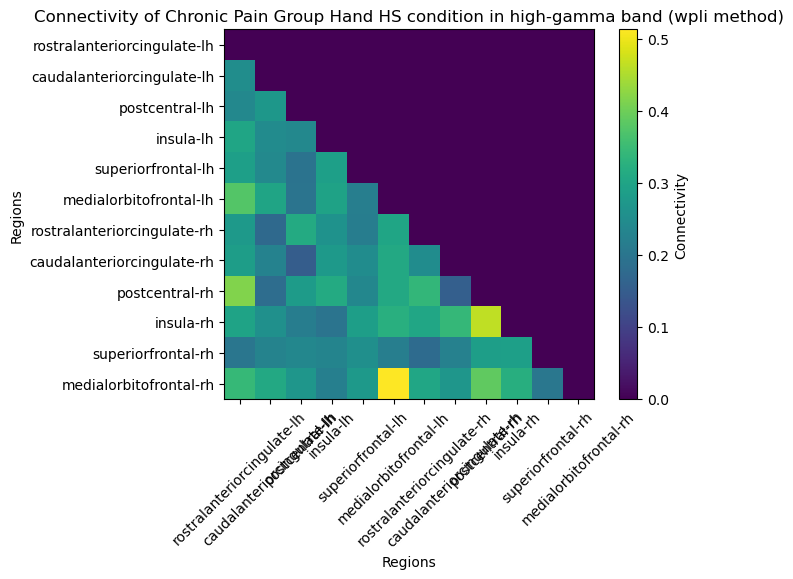

TypeError: 'str' object is not callable

In [10]:
fc.plot_and_save(con_data, fc.plot_connectivity(con_data, method, band, roi_names, group, condition), method, band, roi_names, group, condition, fc_path)
fc.plot_and_save(con_data, fc.plot_connectivity_circle(con_data, method, band, roi_names, group, condition), method, band, roi_names, group, condition, fc_path)